In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [23]:
df = pd.read_csv('medical_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,response
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [24]:
# Drop unecessary columns
df.drop(columns=['ca'], inplace = True)

# Replace all missing inputs ('?') with NaN or Not a Number
df = df.replace('?', np.nan)

# Convert any non-numeric columns to 'Int64' 
df[['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 
    'thal', 'response']] = df[['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                               'exang', 'slope', 'thal', 'response']].astype('Int64')

# Display the column data types to ensure they are all numeric
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      Int64
chol          Int64
fbs           Int64
restecg       Int64
thalach       Int64
exang         Int64
oldpeak     float64
slope         Int64
thal          Int64
response      Int64
dtype: object

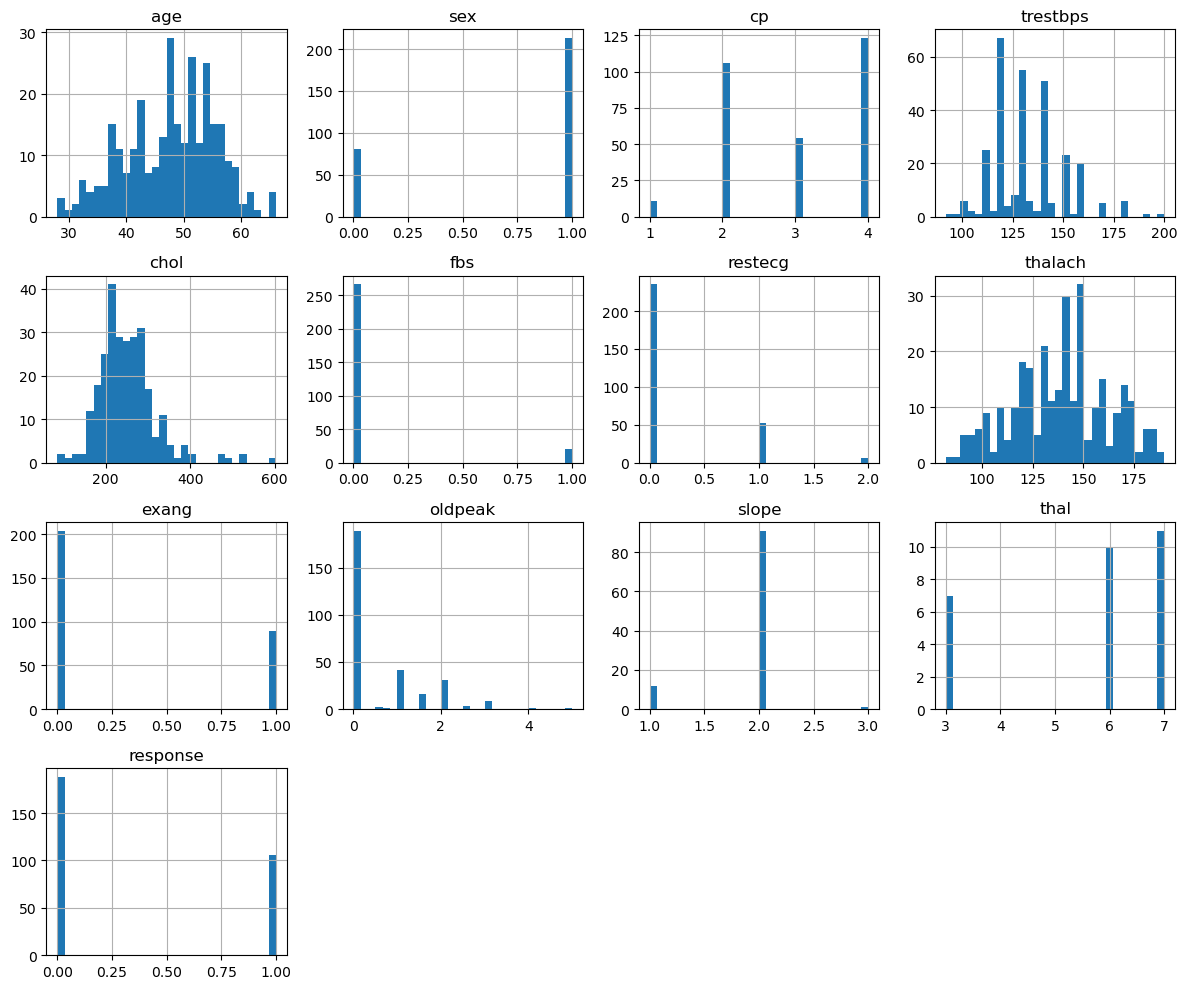

In [25]:
# Create a histogram for each column in the df
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

In [26]:
# Find and calculate which columns have missing (NaN) values
print(df.isna().sum())

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
thal        266
response      0
dtype: int64


In [27]:
# Display df before interpolation of the NaN values
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,response
0,28,1,2,130,132,0,2,185,0,0.0,<NA>,<NA>,0
1,29,1,2,120,243,0,0,160,0,0.0,<NA>,<NA>,0
2,29,1,2,140,<NA>,0,0,170,0,0.0,<NA>,<NA>,0
3,30,0,1,170,237,0,1,170,0,0.0,<NA>,6,0
4,31,0,2,100,219,0,1,150,0,0.0,<NA>,<NA>,0


In [28]:
# List of columns that contain missing values
cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'thal', 'response']

# Interpolate missing values 
df[cols] = df[cols].interpolate(method='linear', limit = 2).fillna(method='bfill')

# Display the df after interpolating the NaN values
df.head()

/tmp/ipykernel_21076/1224155805.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cols] = df[cols].interpolate(method='linear', limit = 2).fillna(method='bfill')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,response
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,2.0,6.0,0.0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,2.0,6.0,0.0
2,29,1,2,140.0,240.0,0.0,0.0,170.0,0.0,0.0,2.0,6.0,0.0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,2.0,6.0,0.0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,2.0,5.785714,0.0


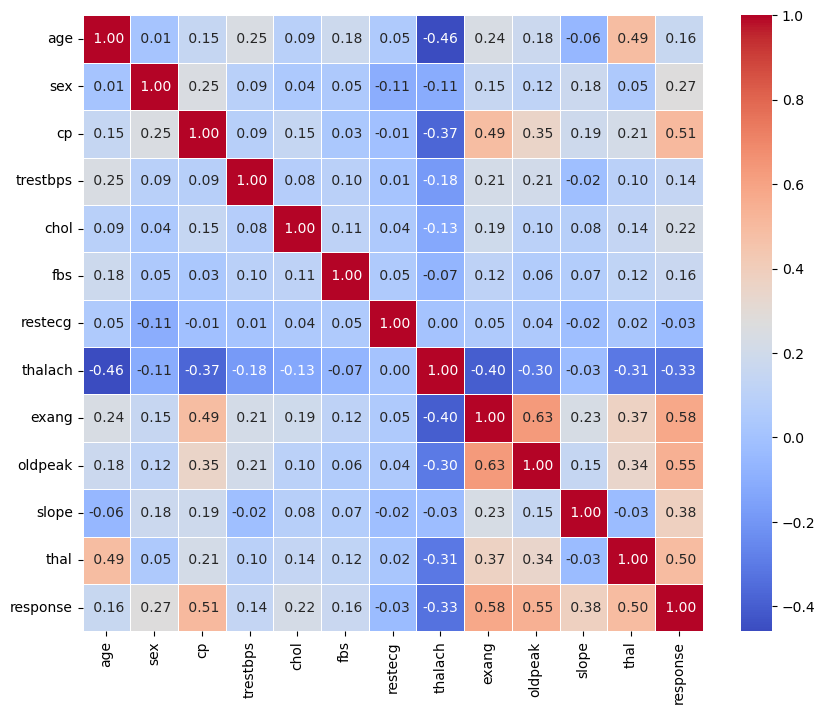

In [29]:
# List of input columns for correlation matrix
inputs = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','thal','response']

# Calculate the correlation matrix of the inputs list
correlation = df[inputs].corr()

# Create and display a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt=' .2f', linewidths=0.5)
plt.show()

In [30]:
# Apply the yeo-johnson transform method to make the selected columns more normal
df_transformed = power_transform(df[inputs].drop(columns=['response', 'chol', 'exang', 'slope']), method='yeo-johnson')

# Create new columns containing the data after transforming the original columns
for i, col in enumerate(cols):
    df[col + '_tr'] = df_transformed[:, i]

# Display updated df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,response,trestbps_tr,chol_tr,fbs_tr,restecg_tr,thalach_tr,exang_tr,slope_tr,thal_tr,response_tr
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,...,0.0,-2.277485,0.616670,-1.027710,-0.034932,-0.270172,2.039021,1.981509,-0.739816,0.283856
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,...,0.0,-2.183368,0.616670,-1.027710,-0.686745,-0.270172,-0.495742,0.887280,-0.739816,0.283856
2,29,1,2,140.0,240.0,0.0,0.0,170.0,0.0,0.0,...,0.0,-2.183368,0.616670,-1.027710,0.531846,-0.270172,-0.495742,1.322605,-0.739816,0.283856
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,...,0.0,-2.087207,-1.621613,-1.953669,1.864110,-0.270172,2.014634,1.322605,-0.739816,0.283856
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,...,0.0,-1.989028,-1.621613,-1.027710,-2.339581,-0.270172,2.014634,0.455309,-0.739816,0.133493


In [31]:
# Select the columns for the predictive model
# We use the transformed versions of the columns
X = df[['age', 'sex', 'cp', 'trestbps_tr', 'chol', 'fbs_tr', 'restecg_tr', 'thalach_tr', 'exang', 'slope', 'thal_tr']]

# Select the target variable
Y = df['response']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
# Create a Logistic Regression Model
model = LogisticRegression(max_iter = 10000)

# Train the model using the training data
model.fit(X_train, y_train)

# Use the model to calculate predictions using the test data
y_pred = model.predict(X_test)

In [33]:
# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Model Accuracy Score: {accuracy}')

Prediction Model Accuracy Score: 0.847457627118644


In [38]:
# Create example data for all inputs of prediction model
example_data = [[41, 1, 2, 0.0, 1.0, 3.0, 130, 132, 0.0, 1.0, 160]] 

# Use model to predict response
heart_disease_prediction = model.predict(example_data)

# Categorize whether the patient has heart disease based on binary response (0 or 1)
response = 'HIGH' if heart_disease_prediction == 1 else 'LOW'

# Display response
print(f'Risk of Heart Disease{response} Risk of Heart Disease Predicted')

HIGH Risk of Heart Disease Predicted


/home/mcrisler/anaconda3/envs/py3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
